<a href="https://colab.research.google.com/github/RakshithaBS/Melanoma/blob/master/Melanoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Importing the data

In [1]:
import os
import numpy as np
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Dropout,BatchNormalization,Flatten

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls gdrive/MyDrive/Colab\ Notebooks
!unzip gdrive/MyDrive/Colab\ Notebooks/CNN_assignment.zip

'Basics of Python Programming.ipynb'	 'tensorflow basics.ipynb'
 CIFAR10.ipynb				 'Time Series.ipynb'
 CNN_assignment.zip			 'transfer learning -1.ipynb'
'Copy of Week1 Tensorflow basics.ipynb'   Untitled0.ipynb
 flowers.zip				  Untitled1.ipynb
 Melanoma.ipynb				  Untitled2.ipynb
 MNIST.ipynb				  Untitled3.ipynb
 NLP.ipynb				  Untitled4.ipynb
'NN feedforward pass.ipynb'		  Untitled5.ipynb
 python_basics.ipynb			  Untitled6.ipynb
'Python for data analysis.ipynb'	 'Week1 Tensorflow basics.ipynb'
'Python for data science.ipynb'		 'week2-course 2.ipynb'
 sentiment_analysis.ipynb
Archive:  gdrive/MyDrive/Colab Notebooks/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  

In [5]:
import pathlib
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [6]:
image_count_train=len(list(data_dir_train.glob('*/*.jpg')))
print("size of train dataset: ",image_count_train)
image_count_test=len(list(data_dir_test.glob('*/*.jpg')))
print("size of test dataset: ",image_count_test)


size of train dataset:  2239
size of test dataset:  118


Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

Create a dataset
Define some parameters for the loader:

In [7]:
from  tensorflow.keras.utils import image_dataset_from_directory
batch_size=32
img_height=180
img_width=180

In [8]:
train_ds = image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),seed = 123,validation_split=0.2,subset='training',shuffle=True)
valid_ds = image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),seed = 123,validation_split=0.2,subset='validation',shuffle=True)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names=train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

## Visualising the images

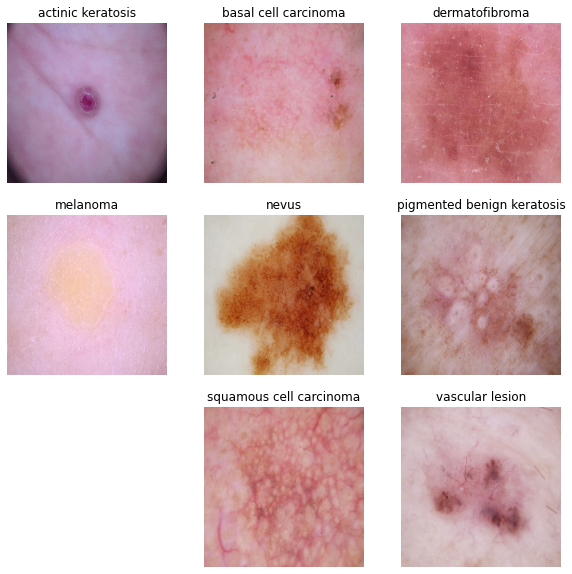

In [10]:
# visualising images for each class

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
printed_images =[]
for images,labels in train_ds.take(1):
  for i in range(9):
    for j in labels:
      if i==j:
        if i in printed_images:
          continue 
        else:
          printed_images.append(i)
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_names[j])
          plt.axis("off")  
          

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Training the model

In [12]:

# training a basic model with 3 layers
cnn_model = Sequential(
    [keras.layers.Rescaling(1./255),
     Conv2D(32,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Conv2D(64,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Conv2D(128,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Flatten(),
     Dense(128,activation='relu'),
     Dense(128,activation='relu'),
     Dense(9,activation='softmax')]
)

# compiling the model
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [13]:
history=cnn_model.fit(train_ds,validation_data=valid_ds,epochs=20)

Epoch 1/20
56/56 [==============================] - 28s 131ms/step - loss: 1.9636 - accuracy: 0.2690 - val_loss: 1.7392 - val_accuracy: 0.3848
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6607 - accuracy: 0.3945 - val_loss: 1.5874 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 2s 38ms/step - loss: 1.5721 - accuracy: 0.4431 - val_loss: 1.4851 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 2s 38ms/step - loss: 1.4584 - accuracy: 0.4777 - val_loss: 1.4306 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 2s 38ms/step - loss: 1.3552 - accuracy: 0.5039 - val_loss: 1.4334 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 2s 38ms/step - loss: 1.3265 - accuracy: 0.5251 - val_loss: 1.4525 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 2s 38ms/step - loss: 1.2277 - accuracy: 0.5625 - val_loss: 1.4772 - val_accuracy: 0.4765
Epoch 8/20


## Plotting the performance of the model - Training v/s validation loss

In [14]:
training_accuracy=history.history['accuracy']
validation_accuracy= history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']


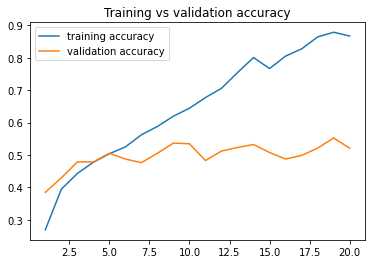

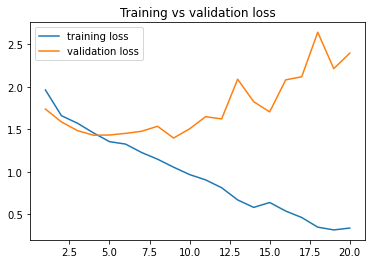

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),training_accuracy,label='training accuracy')
plt.plot(range(1,21),validation_accuracy,label='validation accuracy')
plt.title("Training vs validation accuracy")
plt.legend()
plt.show()

plt.plot(range(1,21),training_loss,label='training loss')
plt.plot(range(1,21),validation_loss,label='validation loss')
plt.title("Training vs validation loss")
plt.legend()
plt.show()

From the graphs above it is clear that the model is overfitting. One of the reasons is that the training dataset is small. We can solve this problem by adding augmentation layer which creates augmented image batches while training the model.

## Adding Data Augmentation layer

Here, horizontal and vertical image flip and rotation is used for data augmentation 



In [16]:
data_augmentation = Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.5)])

### Visualizing augmented data

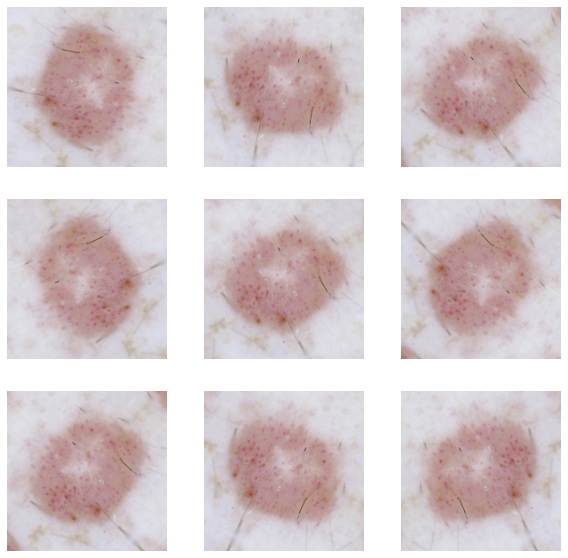

In [17]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3,3,i+1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")
      

### Re-training the model with augmentation layer

In [18]:
cnn_augmented_model = Sequential(
    [keras.layers.Rescaling(1./255),
     data_augmentation,
     Conv2D(32,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Conv2D(64,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Conv2D(128,(3,3),activation='relu'),
     MaxPool2D((2,2)),
     Flatten(),
     Dense(128,activation='relu'),
     Dense(128,activation='relu'),
     Dense(9,activation='softmax')]
)
cnn_augmented_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [19]:
history=cnn_augmented_model.fit(train_ds,validation_data=valid_ds,epochs=20)

Epoch 1/20
56/56 [==============================] - 4s 43ms/step - loss: 2.0221 - accuracy: 0.2355 - val_loss: 1.9784 - val_accuracy: 0.2483
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.8666 - accuracy: 0.3030 - val_loss: 1.7754 - val_accuracy: 0.3490
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.7784 - accuracy: 0.3555 - val_loss: 1.7100 - val_accuracy: 0.3893
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.6205 - accuracy: 0.4135 - val_loss: 1.5461 - val_accuracy: 0.4251
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.5853 - accuracy: 0.4163 - val_loss: 1.5104 - val_accuracy: 0.4609
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.5153 - accuracy: 0.4453 - val_loss: 1.6971 - val_accuracy: 0.3758
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4668 - accuracy: 0.4732 - val_loss: 1.5484 - val_accuracy: 0.4564
Epoch 8/20
56

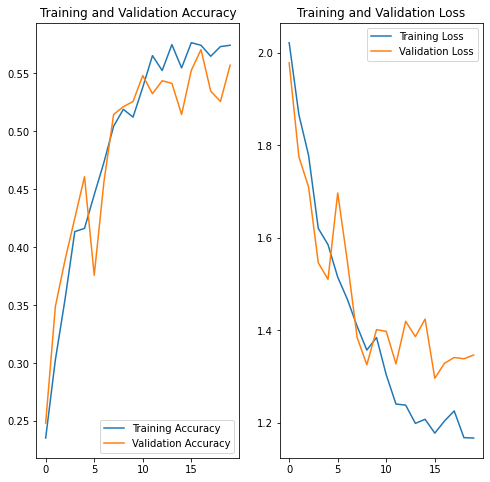

In [20]:
# visualizing the performance of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Conclusion
From the above graphs it is seen that there is a slight difference in the training and validation accuracy. By adding the data augmentation layer it did the solve of the problem of overfitting. However, if we notice the training accuracy is pretty low( ~60%). The model is underfitting, i.e it isn't able to correctly identify the underlying patterns. One of the reasons for this could be due to class imbalance.


### Visualizing the class Imbalance issue


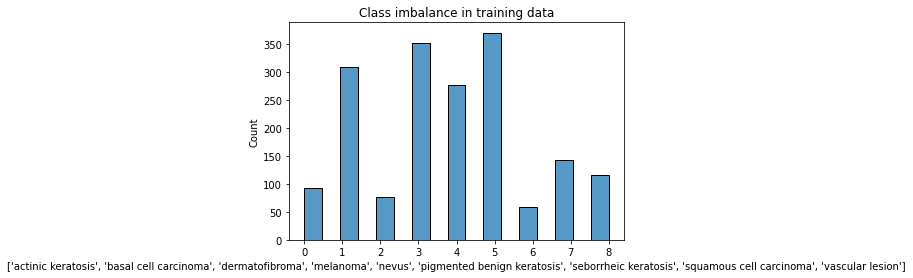

In [26]:
import seaborn as sns
# rectifying class imbalance
total_labels=[]
for images,labels in train_ds:
 #ele,count=np.unique(labels.numpy(),return_counts=True)
  for i in labels.numpy():
    total_labels.append(i)
  

sns.histplot(total_labels)
plt.xlabel(class_names)
plt.title("Class imbalance in training data")
plt.show()

## Conclusion
- class 5,i.e pigmented benign keratosis  has the highest number of samples.
- class 6,i.e seborrheic keratosis has the lowest no of samples.


This problem of class imbalance can be solved using data augmentation. But unlike the previous approach instead of adding augmentation layer during training we can create more sample augmented images accross classes . 
This can be done using the Augmentor package.





## Creating more augmented images

In [27]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# augmentor
path_to_training_dataset ="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
  p = Augmentor.Pipeline(path_to_training_dataset+i)
  p.rotate(probability=0.7,max_left_rotation=10,max_right_rotation=10)
  p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB834579110>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB83492D850>: 100%|██████████| 500/500 [00:19<00:00, 25.23 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB8345F2190>: 100%|██████████| 500/500 [00:18<00:00, 27.16 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FB8345A2910>: 100%|██████████| 500/500 [01:29<00:00,  5.59 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x674 at 0x7FB834605090>: 100%|██████████| 500/500 [01:21<00:00,  6.13 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8344FCF90>: 100%|██████████| 500/500 [00:17<00:00, 29.17 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB8348CAFD0>: 100%|██████████| 500/500 [00:40<00:00, 12.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB834543790>: 100%|██████████| 500/500 [00:17<00:00, 29.37 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB83871DF90>: 100%|██████████| 500/500 [00:16<00:00, 30.39 Samples/s]


In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [32]:
# the no of images added in each class
labels_count=[]
for i in class_names:
  class_count = len(list(data_dir_train.glob(i+'/output/*.jpg')))
  labels_count.append(class_count)

labels_count

[500, 500, 500, 500, 500, 500, 500, 500, 500]

## Training the model on augmented data

In [33]:
batch_size=32
img_height=180
img_width=180

In [34]:
train_ds = image_dataset_from_directory(data_dir_train,seed=123,validation_split=0.2,subset='training',image_size=(img_height,img_width),batch_size=32,shuffle=True)
valid_ds = image_dataset_from_directory(data_dir_train,seed=123,validation_split=0.2,subset='validation',image_size=(img_height,img_width),batch_size=32,shuffle=True)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [36]:
cnn_model_2 = Sequential(
    [keras.layers.Rescaling(1/255),
     Conv2D(32,(3,3),padding='same',activation='relu'),
     MaxPool2D(2,2),
     Dropout(0.2),
     Conv2D(64,(3,3),padding='same',activation='relu'),
     MaxPool2D(2,2),
     Dropout(0.2),
     Conv2D(128,(3,3),padding='same',activation='relu'),
     MaxPool2D(2,2),
     Flatten(),
     Dense(128,activation='relu'),
     Dense(9,activation='softmax')
     ]
)

cnn_model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history=cnn_model_2.fit(train_ds,validation_data=valid_ds,epochs=30)

Epoch 1/30
169/169 [==============================] - 27s 145ms/step - loss: 2.1530 - accuracy: 0.2124 - val_loss: 1.8067 - val_accuracy: 0.3267
Epoch 2/30
169/169 [==============================] - 25s 142ms/step - loss: 1.5424 - accuracy: 0.4060 - val_loss: 1.5233 - val_accuracy: 0.4061
Epoch 3/30
169/169 [==============================] - 26s 148ms/step - loss: 1.3544 - accuracy: 0.4918 - val_loss: 1.3779 - val_accuracy: 0.4766
Epoch 4/30
169/169 [==============================] - 25s 143ms/step - loss: 1.2286 - accuracy: 0.5458 - val_loss: 1.2733 - val_accuracy: 0.5301
Epoch 5/30
169/169 [==============================] - 25s 144ms/step - loss: 1.1176 - accuracy: 0.5920 - val_loss: 1.1736 - val_accuracy: 0.5650
Epoch 6/30
169/169 [==============================] - 25s 144ms/step - loss: 0.9896 - accuracy: 0.6391 - val_loss: 1.1502 - val_accuracy: 0.5761
Epoch 7/30
169/169 [==============================] - 25s 143ms/step - loss: 0.9173 - accuracy: 0.6680 - val_loss: 1.0187 - val_ac

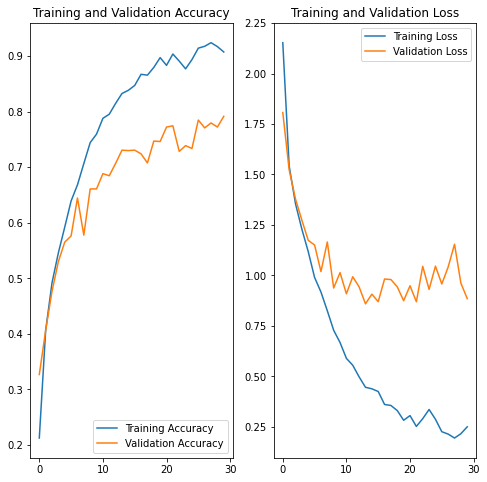

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
